# 4.9 Intro to Data Visualization with Python Task Part 2

# Contents

### 1. Importing Libaries and Data

### 2. Shwoing complete columns

### 3. Histogram

### 4. Bar Chart

### 5. Line Chart

### 6. Line Chart Exploring Connections

### 7. Scatterplot

# Script

### 1. Importing Libaries and Data

In [1]:
#import libaries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path = r'C:\Users\tinar\OneDrive\Dokumente\00 DATA ANALYST Carrer Foundry\04 Immersion Course\4. Python Fundamentals for Data Analysts\2209 Instacart Basket Analysis'

In [3]:
# import of orders_products_merged
ords_prods_custo = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'instacart_data_complete.pkl'))

In [5]:
ords_prods_custo.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,familiy_members,fam_status,income
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 2. Shwoing complete columns

In [6]:
complete_columns = list(ords_prods_custo.columns)

In [7]:
complete_columns

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_time_of_the_day',
 'max_order',
 'loyalty_flag',
 'avg_price',
 'spender_flag',
 'median_days_since_prior_order',
 'frequency_flag',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'familiy_members',
 'fam_status',
 'income']

### 3. Histogram

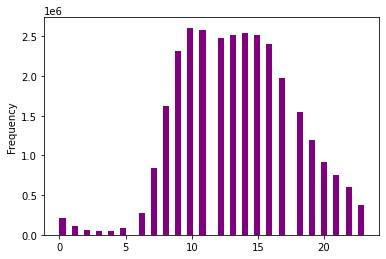

In [10]:
hist = ords_prods_custo['order_hour_of_day'].plot.hist(bins = 50, color = 'purple')

We can see that most orders are placed around 10 a.m. and remain high until 5 p.m. From 5 p.m. on orders contantly drop until 1 a.m. There are hardly any orders between 1 a.m. and 6 a.m. and then they start to increase again. 

In [15]:
# Exporting the vizualisation
hist.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','hist_order_hour_of_day_4.9.png'))

### 4. Bar Chart

In [ ]:
#reminder 
# ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
# ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
# ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

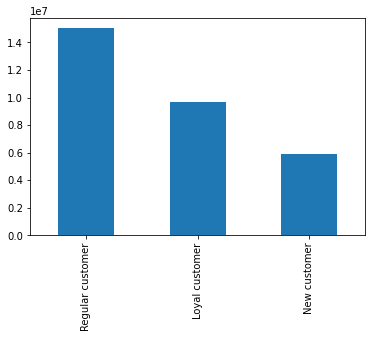

In [16]:
bar = ords_prods_custo['loyalty_flag'].value_counts().plot.bar()

We can see, that most of the customers are regular customers with 10 to 40 places orders. Loyal customer who have placed more than 40 orders so far are a bit less. And the right bar displays the new customers who have placed less than 10 orders so far.

In [23]:
# Exporting the vizualisation
bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','distributio_of_loyalty_4.9.png'))

### 5. Line Chart (sample) 

In [ ]:
# line chart using subset

In [26]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custo)) <= 0.7

In [27]:
dev

array([False,  True, False, ..., False,  True,  True])

In [28]:
# Store 70% of the sample in data frame big
big = ords_prods_custo[dev]

In [29]:
# Store 30% of the sample in data frame small
small = ords_prods_custo[~dev]

In [30]:
# Checking length is correct
len(big)+len(small)

30629741

In [ ]:
# Creating a new dataframe with only the columns needed for the line chart

In [41]:
df_small = small[['order_hour_of_day','prices']]

In [42]:
df_small

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
30629722,14,10.7
30629724,3,10.7
30629729,18,10.7
30629737,11,8.1


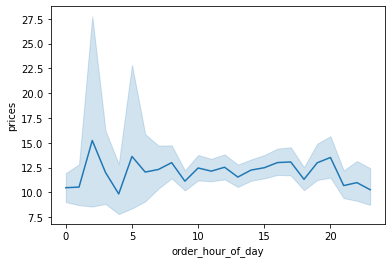

In [59]:
line = sns.lineplot(data = df_small, x = 'order_hour_of_day',y = 'prices')

High-value-orders are placed in the morning hours of a day.. thats when the frequency of the orders are lowest. 

In [60]:
# Exporting the vizualisation
line.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','frequency_of_orders_prices_4.9.png'))

### 6. Line chart exploring the connections between age and number of dependents (familiy members)

In [48]:
# Creating a new dataframe with only the columns needed for the line chart
df_small_2 = small[['age','familiy_members']]

In [49]:
df_small_2

,age,familiy_members
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
30629722,25,0
30629724,25,0
30629729,25,0
30629737,22,3


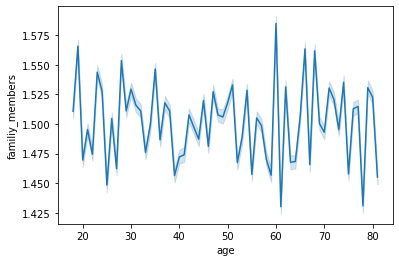

In [55]:
line_1 = sns.lineplot(data = df_small_2, x = 'age',y = 'familiy_members')

In [58]:
df_small_2['familiy_members'].describe()

count    9.187984e+06
mean     1.501680e+00
std      1.118523e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: familiy_members, dtype: float64

#### There is no connection between age and family situation

In [61]:
# Exporting the vizualisation
line_1.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','age_family_member_4.9.png'))

### 7. Scatterplot

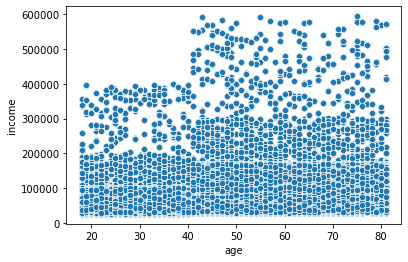

In [6]:
scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_custo)

##### People older than 40 have a higher income than people under 40

In [8]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','age_income_4.9.png'))